In [ ]:
import yake
import nltk
nltk.download("book")
nltk.download("omw")
nltk.download("wordnet")
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.book import *
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
import networkx as nx
import matplotlib.pyplot as plt

%run '02_create_initial_funtions.ipynb'

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package dependency_treebank is already up-to-date!
[nltk_data]    | Downloadi

# Functions

In [ ]:
def clousure_graph(synset, fn):
  seen = set()
  graph = nx.DiGraph()
  labels = {}

  def recurse(s):
    if not s in seen:
      seen.add(s)
      labels[s.name] = s.name().split('.')[0]
      graph.add_node(s.name)
      for s1 in fn(s):
        graph.add_node(s1.name)
        graph.add_edge(s.name, s1.name)
        recurse(s1)
  recurse(synset)
  return graph, labels

def draw_text_graph(G, labels):
    plt.figure(figsize=(18, 12))
    pos = nx.planar_layout(G, scale=18)
    nx.draw_networkx_nodes(G, pos, node_color="red", linewidths=0, node_size=500)
    nx.draw_networkx_labels(G, pos, font_size=20, labels=labels)
    nx.draw_networkx_edges(G, pos)
    plt.xticks([])
    plt.yticks([])

def show_syns(word, lang="spa"):
    ss = wn.synsets(word, lang=lang)
    for syn in ss:
        print(f'{syn.name()}: {syn.definition()}')
        for name in syn.lemma_names():
            print(f'\t- {name}')
    return ss

# Synsets: grupo de sinónimos

In [ ]:
ss = wn.synsets("Jugar", lang="spa")
ss

[Synset('play.v.16'),
 Synset('play.v.01'),
 Synset('move.v.15'),
 Synset('meet.v.10'),
 Synset('play.v.29'),
 Synset('toy.v.02'),
 Synset('play.v.09'),
 Synset('play.v.05')]

In [ ]:
# Exploración Synsets
for syn in ss:
    print(f'{syn.name()}: {syn.definition()}')
    for name in syn.lemma_names():
        print(f'\t- {name}')
    print("*"*30)

play.v.16: engage in an activity as if it were a game rather than take it seriously
	- play
	- toy
******************************
play.v.01: participate in games or sport
	- play
******************************
move.v.15: have a turn; make one's move in a game
	- move
	- go
******************************
meet.v.10: contend against an opponent in a sport, game, or battle
	- meet
	- encounter
	- play
	- take_on
******************************
play.v.29: make bets
	- play
******************************
toy.v.02: manipulate manually or in one's mind or imagination
	- toy
	- fiddle
	- diddle
	- play
******************************
play.v.09: move or seem to move quickly, lightly, or irregularly
	- play
******************************
play.v.05: be at play; be engaged in playful activity; amuse oneself in a way characteristic of children
	- play
******************************


In [ ]:
# Obtener todos los sinonimos
sinonimos = set([name for syn in ss for name in syn.lemma_names()])
sinonimos

{'diddle',
 'encounter',
 'fiddle',
 'go',
 'meet',
 'move',
 'play',
 'take_on',
 'toy'}

# Hipónimos

In [ ]:
ss[0].hyponyms()

[]

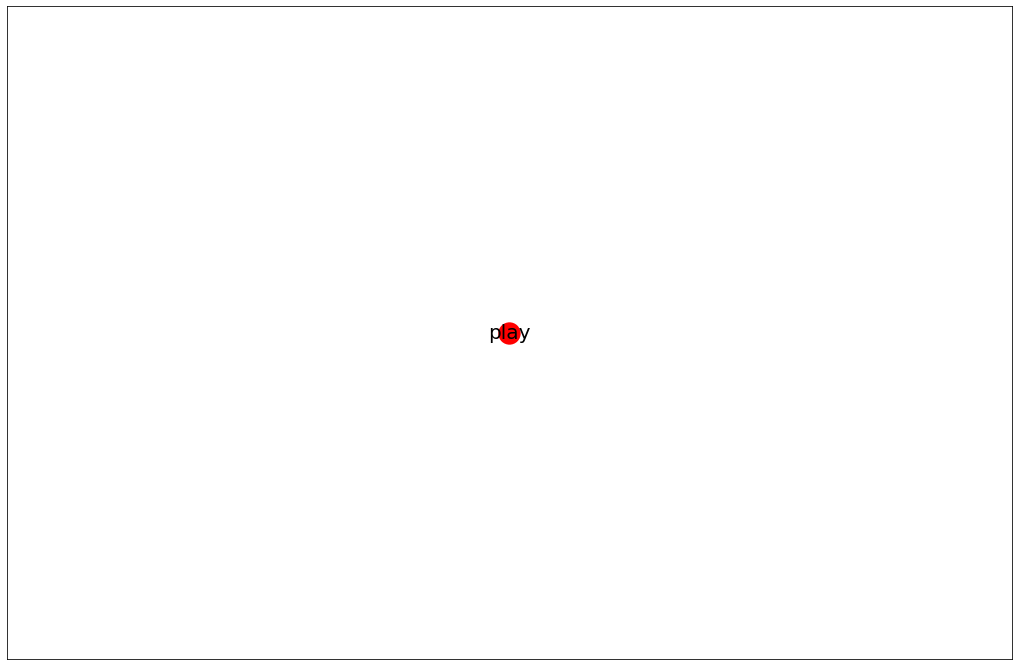

In [ ]:
G, labels = clousure_graph(ss[0], lambda s: s.hyponyms())
draw_text_graph(G, labels)

# Hiperónimos

In [ ]:
ss[0].hypernyms()

[Synset('act.v.02')]

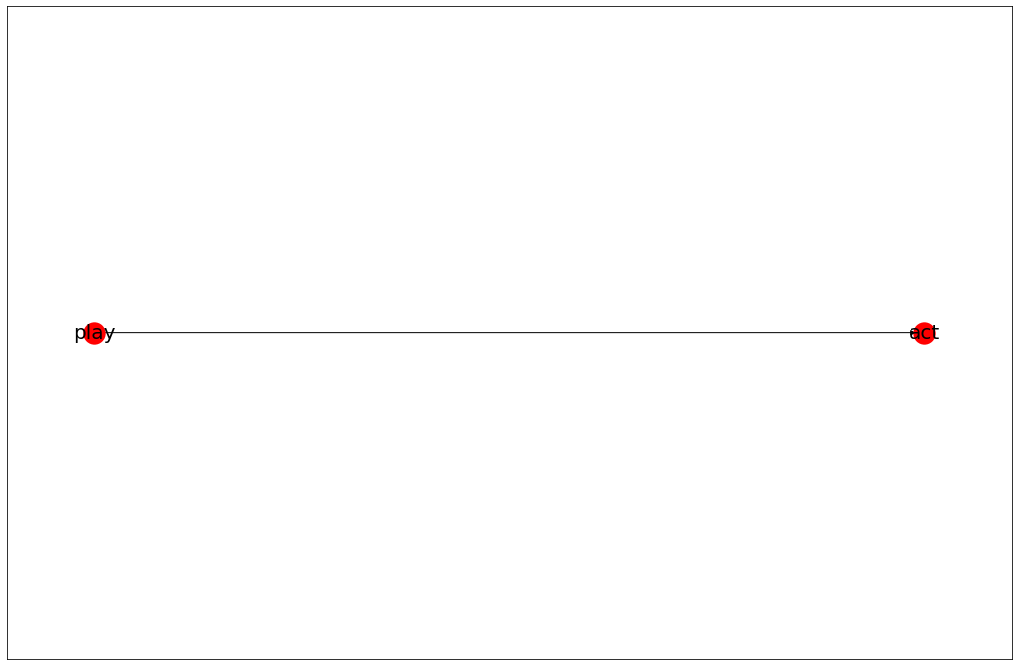

In [ ]:
G, labels = clousure_graph(ss[0], lambda s: s.hypernyms())
draw_text_graph(G, labels)

# Similitud semantica

In [ ]:
ss_build = show_syns("Armar")

set_up.v.04: get ready for a particular purpose or event
	- set_up
	- lay_out
	- set
arm.v.01: prepare oneself for a military confrontation
	- arm
	- build_up
	- fortify
	- gird
pitch.v.08: erect and fasten
	- pitch
	- set_up
assemble.v.01: create by putting components or members together
	- assemble
	- piece
	- put_together
	- set_up
	- tack
	- tack_together
armor.v.01: equip with armor
	- armor
	- armour
commission.v.01: put into commission; equip for service; of ships
	- commission


In [ ]:
ss_run = show_syns("ejecutar")

follow_through.v.02: pursue to a conclusion or bring to a successful issue
	- follow_through
	- follow_up
	- follow_out
	- carry_out
	- implement
	- put_through
	- go_through
execute.v.07: sign in the presence of witnesses
	- execute
perform.v.01: carry out or perform an action
	- perform
	- execute
	- do
perform.v.03: give a performance (of something)
	- perform
play.v.06: replay (as a melody)
	- play
	- spiel
interpret.v.03: give an interpretation or rendition of
	- interpret
	- render
execute.v.01: kill as a means of socially sanctioned punishment
	- execute
	- put_to_death
execute.v.02: murder in a planned fashion
	- execute
execute.v.04: carry out the legalities of
	- execute


In [ ]:
ss_improve = show_syns("Mejorar")

better.v.03: get better
	- better
	- improve
	- ameliorate
	- meliorate
turn_around.v.03: improve significantly; go from bad to good
	- turn_around
	- pick_up
better.v.02: to make better
	- better
	- improve
	- amend
	- ameliorate
	- meliorate
help.v.08: improve; change for the better
	- help
remit.v.07: diminish or abate
	- remit
mend.v.02: heal or recover
	- mend
	- heal
better.v.01: surpass in excellence
	- better
	- break
clear_up.v.04: become clear
	- clear_up
	- clear
	- light_up
	- brighten


In [ ]:
ss_classifier = show_syns("Clasificar")

classify.v.01: arrange or order by classes or categories
	- classify
	- class
	- sort
	- assort
	- sort_out
	- separate
pigeonhole.v.02: treat or classify according to a mental stereotype
	- pigeonhole
	- stereotype
	- stamp
rate.v.01: assign a rank or rating to
	- rate
	- rank
	- range
	- order
	- grade
	- place
classify.v.02: declare unavailable, as for security reasons
	- classify


In [ ]:
ss_build[0].path_similarity(ss_improve[0]) * 100

14.285714285714285

In [ ]:
ss_build[1].path_similarity(wn.synsets("construir", lang="spa")[0]) * 100

25.0

# Obtener verbos

In [ ]:
text = list(get_keywords("My PC can run a game?")[1]) # or -> nltk.word_tokenize("Quiero armar una pc gamer")
text

['game', 'can', 'run']

In [ ]:
pos_tagged = nltk.pos_tag(text)
pos_tagged

[('game', 'NN'), ('can', 'MD'), ('run', 'VB')]

In [ ]:
verbos = list(filter(lambda x: x[1] == "VB", pos_tagged))
verbos

[('run', 'VB')]

In [ ]:
ss = wn.synsets(verbos[0][0])

In [ ]:
ss_build

[]

In [ ]:
# best = (None, -1)
# for ssp in [ss_run, ss_build, ss_classifier, ss_improve]:
#     for ssb in ssp: 
#         for ssr in ss:
#             score = ssb.path_similarity(ssr)
#             if score > best[1]:
#                 msg = f"{ssb.name()}|{ssr.name()}: {score}"
#                 print(msg)
#                 best = (msg, score)

follow_through.v.02|run.n.01: 0.0625
follow_through.v.02|test.n.05: 0.07692307692307693
follow_through.v.02|run.n.08: 0.09090909090909091
follow_through.v.02|run.n.10: 0.1
follow_through.v.02|run.v.01: 0.125
follow_through.v.02|scat.v.01: 0.14285714285714285
follow_through.v.02|function.v.01: 0.16666666666666666
follow_through.v.02|run.v.21: 0.25
perform.v.01|function.v.01: 0.3333333333333333


In [ ]:
associated_keywords = {
    "build": set([name for syn in ss_build for name in syn.lemma_names()]) | set(["build"]),
    "can_run": set([name for syn in ss_run for name in syn.lemma_names()]) | set(["run"]),
    "improve": set([name for syn in ss_improve for name in syn.lemma_names()]) | set(["improve"]),
    "classifier": set([name for syn in ss_classifier for name in syn.lemma_names()]) | set(["classify"]),
}
associated_keywords

{'build': {'arm',
  'armor',
  'armour',
  'assemble',
  'build',
  'build_up',
  'commission',
  'fortify',
  'gird',
  'lay_out',
  'piece',
  'pitch',
  'put_together',
  'set',
  'set_up',
  'tack',
  'tack_together'},
 'can_run': {'carry_out',
  'do',
  'execute',
  'follow_out',
  'follow_through',
  'follow_up',
  'go_through',
  'implement',
  'interpret',
  'perform',
  'play',
  'put_through',
  'put_to_death',
  'render',
  'run',
  'spiel'},
 'improve': {'ameliorate',
  'amend',
  'better',
  'break',
  'brighten',
  'clear',
  'clear_up',
  'heal',
  'help',
  'improve',
  'light_up',
  'meliorate',
  'mend',
  'pick_up',
  'remit',
  'turn_around'},
 'classifier': {'assort',
  'class',
  'classify',
  'grade',
  'order',
  'pigeonhole',
  'place',
  'range',
  'rank',
  'rate',
  'separate',
  'sort',
  'sort_out',
  'stamp',
  'stereotype'}}

In [ ]:
def get_action():
    text = input("What do you do? ").lower()
    _, words = get_keywords(text)
    # pos_tagged = nltk.pos_tag(words)
    # verbos = list(filter(lambda x: "VB" in x[1], pos_tagged))
    # verbos = set(map(lambda x: x[0], verbos))
    for function, associated in associated_keywords.items():
        diff = words & associated
        if diff:
            print(f"{function} is a function selected")
            return functions[function]
    return lambda: print("Nothing to do :(")

In [ ]:
get_action()

classifier is a function selected


<function __main__.<lambda>()>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=07e29549-6cbf-4e88-b69c-0fc48f2d6023' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>